| Model                 | Açıklama                                                                      |
|----------------------|--------------------------------------------------------------------------------|
| **Extra Trees**       | Rastgele karar ağaçları (ensembl yöntemi), çok iyi genelleyebilir.            |
| **K-NN**              | En yakın komşulara bakar (benzer üst yarısı olan yüzlerin alt kısmı nasıl?).  |
| **Linear Regression** | Piksel ilişkisini doğrusal varsayar (gerçek yüz verisi için çok basit kalır). |
| **Ridge**             | Linear regression + L2 regularization (aşırı öğrenmeyi azaltır).              |


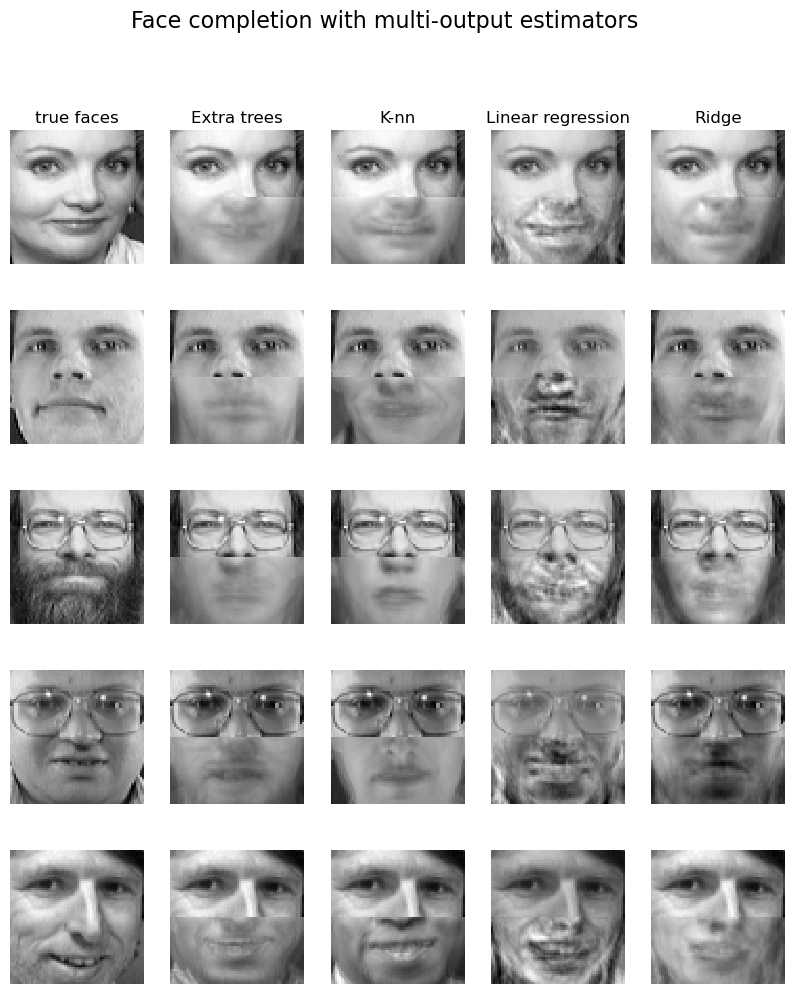

In [3]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

# fetch_olivetti_faces fonksiyonu, hazır bir yüz veri setini otomatik olarak indirir ve belleğe yükler.
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]  # İlk 30 kişi eğitim verisi
test = data[targets >= 30]  # Test on independent people - Son 10 kişi test verisi 

# Test on a subset of people - Rastgele 5 test yüzü seç
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2] # üst piksel kısmı (girdi)
# Lower half of the faces
y_train = train[:, n_pixels // 2 :] # alt piksel kısmı (çıktı)
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

## Random Forest:
**"Her ağaç karar verirken birkaç özelliğe odaklanır ve hangisi daha iyi ayırıyorsa onu seçer."**
**Örnek:** Öğrenci notlarına göre sınıflandırma yaparken:
- ders çalıştı mı?, uyku süresi?, sınav günü morali?
- Bu üçünden en iyi ayrım yapanı seçer.

## Extra Trees:
"Ağaçlar karar verirken hem özelliği hem de eşik değerini tamamen rastgele seçer."
__Örnek:__ Aynı üç özellikten rastgele birini alır ve "uyku süresi < 4.6 saat" gibi rastgele bir eşik seçer.
- Deneme yanılmayla öğrenir.
### Neden Kullanılır?
- Extra Trees, daha hızlıdır çünkü:
    - Split için en iyi değeri aramaz.
    - Eğitim sırasında brute force yerine rastgelelik kullanır.
- Özellikle büyük veri setlerinde hız ve genelleme avantajı sağlar.
- Ama bazen **Random Forest** daha kararlı ve doğru sonuç verebilir çünkü seçimler daha akıllıcadır.

| Özellik                    | **Random Forest**                                         | **Extra Trees (ExtraTreesRegressor)**                          |
|---------------------------|-----------------------------------------------------------|----------------------------------------------------------------|
| **Özellik seçimi**         | Rastgele bir alt küme içinden **en iyi bölmeyi** arar     | Rastgele bir alt küme içinden **tamamen rastgele bölme** seçer |
| **Bölme noktası (split)**  | En iyi ayrımı yapan eşik değeri bulunur (örneğin `x < 7`) | Split noktası da **rastgele seçilir**                          |
| **Çeşitlilik (diversity)** | Daha az çeşitlilik                                        | Daha çok çeşitlilik sağlar                                     |
| **Overfitting riski**      | Genellikle düşüktür                                       | Daha da düşüktür (ağaçlar daha farklı öğrenir)                 |
| **Tahmin gücü**            | Genellikle daha hassas                                    | Daha hızlı, ama biraz daha az hassas olabilir                  |
| **Hız (eğitim süresi)**    | Görece daha yavaş                                         | Daha hızlı (çünkü split optimizasyonu yapılmaz)                |


In [2]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

RandomForestRegressor(n_estimators=100)
ExtraTreesRegressor(n_estimators=100)

ExtraTreesRegressor()